### Problem Statement 
**Predicting Survival in the Titanic Data Set** 

We will be using a decision tree to make predictions about the Titanic data  set from Kaggle. This data set provides information on the Titanic  passengers and can be used to predict whether a passenger survived or  not.


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch  (Parents/children aboard), and Fare to predict whether a passenger  survived. 

NOTE:The solution shared through Github should contain the source code used and the screen shot of the output. 

In [1]:
import pandas as pd
dataset = pd.read_csv("Titanic_dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling Missing Values

In [2]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we are going to use Age Column let's remove the Null values from that feature.

<AxesSubplot:>

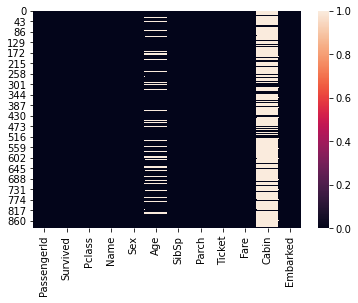

In [3]:
## Checking the Null values.
import seaborn as sns
sns.heatmap(dataset.isnull())

C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

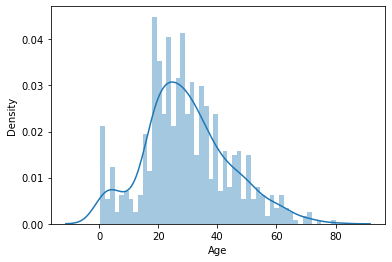

In [4]:
sns.distplot(dataset["Age"].dropna(), bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

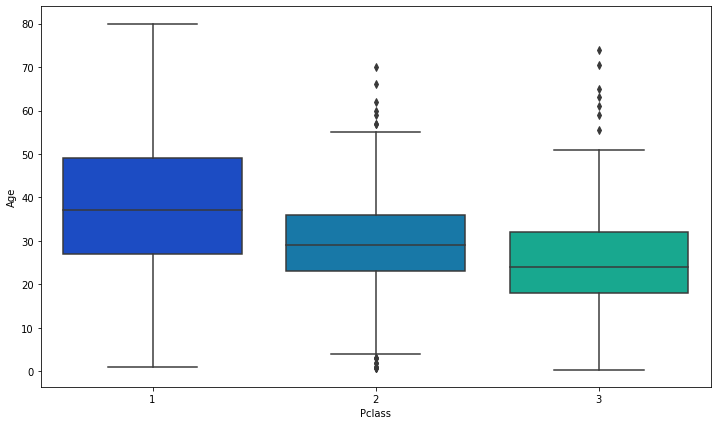

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y="Age", data=dataset, palette="winter")

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
## You use only Pclass, Sex, Age, SibSp, Parch and Fare   

X = dataset.drop(columns=["PassengerId", 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'])
y = dataset.Survived

## handling the categorical feature

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop="first"),[0])], remainder="passthrough")
X = ct.fit_transform(X)
X = pd.DataFrame(X)
X = X.drop(columns=[1,2])
X.head()

,0,3,4,5,6
0,0,22,1,0,7.25
1,0,38,1,0,71.2833
2,0,26,0,0,7.925
3,0,35,1,0,53.1
4,0,35,0,0,8.05


## Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training The Model

In [13]:
## As instructed using Decision tree.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [14]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuraccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[84 26]
 [27 42]]
Accuraccuracy: 0.7039106145251397


## Applying k-Fold Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 50)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.33 %
Standard Deviation: 11.83 %


## Applying Grid Search to find the best model and the best parameters

In [18]:
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 21)
num_leafs = np.arange(1, 100, 5)

param_grid = [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)

print(gs.best_params_)

0.7149647887323944
{'max_depth': 7, 'min_samples_leaf': 21}


In [19]:
my_model = gs.best_estimator_

my_model.fit(X_train, y_train)

y_pred = my_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuraccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[100  10]
 [ 33  36]]
Accuraccuracy: 0.7597765363128491
